In [4]:
import pandas as pd

# Full path to the CSV file
file_path = 'C:\\Users\\aaron\\OneDrive\\School Projects\\Savant Data\\pitch_df.csv'

# Read the CSV file into a Pandas DataFrame
pitch_df = pd.read_csv(file_path)



In [5]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('pitches_df.db')
table_name = 'pitches_table'
pitch_df.to_sql(table_name, conn, if_exists='replace', index=False)

desired_descriptions = ['foul', 'swinging_strike', 'hit_into_play', 'foul_tip', 'swinging_strike_blocked']

query_RHP_FF = f"""
    SELECT player_name, description, release_speed, pfx_x, pfx_z, zone, release_extension
    FROM pitches_table
    WHERE pitch_type = 'FF' AND p_throws = 'R' AND description IN {tuple(desired_descriptions)}
"""

RHP_FF = pd.read_sql_query(query_RHP_FF, conn)

print(RHP_FF.head())


        player_name    description  release_speed  pfx_x  pfx_z  zone  \
0     Lyles, Jordan           foul           89.7  -0.69   1.40   3.0   
1      Gray, Josiah  hit_into_play           93.2  -0.92   0.75   5.0   
2  Strider, Spencer  hit_into_play           98.3  -0.32   1.73   9.0   
3  Strider, Spencer           foul           98.3  -0.32   1.43   2.0   
4    Kelly, Merrill  hit_into_play           92.2  -0.57   1.36   5.0   

   release_extension  
0                7.2  
1                5.9  
2                7.2  
3                7.0  
4                6.3  


In [7]:
import pandas as pd

# Function to calculate relative movement for each pitch
def calculate_relative_movement(df):
    # Initialize empty lists to store the results for vertical and horizontal movements
    result_z = []
    result_x = []
    
    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        # Filter data to include pitches within ±2 MPH of release speed and ±0.05 feet of release point extension
        filtered_group = df[
            (df['release_speed'].between(row['release_speed'] - 2, row['release_speed'] + 2)) &
            (df['release_extension'].between(row['release_extension'] - 0.05, row['release_extension'] + 0.05))
        ]
        
        # Calculate the average vertical movement for the filtered group
        avg_vertical_movement = filtered_group['pfx_z'].mean()
        
        # Calculate the average horizontal movement for the filtered group
        avg_horizontal_movement = filtered_group['pfx_x'].mean()
        
        # Calculate the relative vertical movement for the current pitch
        relative_vertical_movement = row['pfx_z'] - avg_vertical_movement
        
        # Calculate the relative horizontal movement for the current pitch
        relative_horizontal_movement = row['pfx_x'] - avg_horizontal_movement
        
        # Append the relative movements to the result lists
        result_z.append(relative_vertical_movement)
        result_x.append(relative_horizontal_movement)
    
    # Add the lists of relative movements as new features in the DataFrame
    df['relative_pfx_z'] = result_z
    df['relative_pfx_x'] = result_x
    
    return df

# Assuming RHP_FF_RHB is your DataFrame containing pitch data
# Calculate both relative vertical and horizontal movements for each pitch
RHP_FF = calculate_relative_movement(RHP_FF)



In [8]:
RHP_FF

,player_name,description,release_speed,pfx_x,pfx_z,zone,release_extension,relative_pfx_z,relative_pfx_x
0,"Lyles, Jordan",foul,89.7,-0.69,1.40,3.0,7.2,0.241393,-0.297811
1,"Gray, Josiah",hit_into_play,93.2,-0.92,0.75,5.0,5.9,-0.616065,-0.228347
2,"Strider, Spencer",hit_into_play,98.3,-0.32,1.73,9.0,7.2,0.402362,0.370146
3,"Strider, Spencer",foul,98.3,-0.32,1.43,2.0,7.0,0.069457,0.345968
4,"Kelly, Merrill",hit_into_play,92.2,-0.57,1.36,5.0,6.3,0.041856,-0.025881
...,...,...,...,...,...,...,...,...,...
80199,"Assad, Javier",foul,92.8,-0.55,1.31,4.0,6.4,-0.000240,0.001956
80200,"VerHagen, Drew",hit_into_play,93.3,-0.24,1.01,5.0,6.5,-0.285023,0.322751
80201,"Nola, Aaron",swinging_strike,94.0,-1.24,1.30,4.0,7.5,-0.007995,-0.667481
80202,"Manoah, Alek",hit_into_play,91.9,-0.96,1.26,8.0,6.8,-0.039325,-0.411217


In [9]:
# Convert 'relative_pfx_z' feature from feet to inches
import pandas as pd
pd.set_option('display.max_rows', 60)
RHP_FF['relative_pfx_z'] *= 12
RHP_FF['relative_pfx_x'] *= 12
RHP_FF






,player_name,description,release_speed,pfx_x,pfx_z,zone,release_extension,relative_pfx_z,relative_pfx_x
0,"Lyles, Jordan",foul,89.7,-0.69,1.40,3.0,7.2,2.896716,-3.573731
1,"Gray, Josiah",hit_into_play,93.2,-0.92,0.75,5.0,5.9,-7.392782,-2.740163
2,"Strider, Spencer",hit_into_play,98.3,-0.32,1.73,9.0,7.2,4.828350,4.441748
3,"Strider, Spencer",foul,98.3,-0.32,1.43,2.0,7.0,0.833489,4.151618
4,"Kelly, Merrill",hit_into_play,92.2,-0.57,1.36,5.0,6.3,0.502267,-0.310575
...,...,...,...,...,...,...,...,...,...
80199,"Assad, Javier",foul,92.8,-0.55,1.31,4.0,6.4,-0.002880,0.023475
80200,"VerHagen, Drew",hit_into_play,93.3,-0.24,1.01,5.0,6.5,-3.420272,3.873015
80201,"Nola, Aaron",swinging_strike,94.0,-1.24,1.30,4.0,7.5,-0.095938,-8.009769
80202,"Manoah, Alek",hit_into_play,91.9,-0.96,1.26,8.0,6.8,-0.471901,-4.934601


In [10]:
from scipy import stats

# Drop rows with missing values in 'release_speed'
RHP_FF.dropna(subset=['release_speed'], inplace=True)

# Calculate z-scores for release speed
RHP_FF['z_score'] = stats.zscore(RHP_FF['release_speed'])

# Set a threshold for excluding outliers
threshold = -3

# Filter out rows with z-scores below the threshold
filtered_RHP_FF = RHP_FF[RHP_FF['z_score'] > threshold]

# Drop rows with incomplete data
filtered_RHP_FF = filtered_RHP_FF.dropna()

# Drop the 'z_score' column from the final DataFrame
filtered_RHP_FF = filtered_RHP_FF.drop(columns=['z_score'])

filtered_RHP_FF

,player_name,description,release_speed,pfx_x,pfx_z,zone,release_extension,relative_pfx_z,relative_pfx_x
0,"Lyles, Jordan",foul,89.7,-0.69,1.40,3.0,7.2,2.896716,-3.573731
1,"Gray, Josiah",hit_into_play,93.2,-0.92,0.75,5.0,5.9,-7.392782,-2.740163
2,"Strider, Spencer",hit_into_play,98.3,-0.32,1.73,9.0,7.2,4.828350,4.441748
3,"Strider, Spencer",foul,98.3,-0.32,1.43,2.0,7.0,0.833489,4.151618
4,"Kelly, Merrill",hit_into_play,92.2,-0.57,1.36,5.0,6.3,0.502267,-0.310575
...,...,...,...,...,...,...,...,...,...
80199,"Assad, Javier",foul,92.8,-0.55,1.31,4.0,6.4,-0.002880,0.023475
80200,"VerHagen, Drew",hit_into_play,93.3,-0.24,1.01,5.0,6.5,-3.420272,3.873015
80201,"Nola, Aaron",swinging_strike,94.0,-1.24,1.30,4.0,7.5,-0.095938,-8.009769
80202,"Manoah, Alek",hit_into_play,91.9,-0.96,1.26,8.0,6.8,-0.471901,-4.934601


In [11]:
#Finding 20,40,60,80,100 percentiles of HB, VB, and RS
import numpy as np

# Calculate percentile values
release_speed_percentiles = np.percentile(filtered_RHP_FF['release_speed'], [0, 20, 40, 60, 80, 100])
pfx_x_percentiles = np.percentile(filtered_RHP_FF['relative_pfx_x'], [0, 20, 40, 60, 80, 100])
pfx_z_percentiles = np.percentile(filtered_RHP_FF['relative_pfx_z'], [0, 20, 40, 60, 80, 100])

# Calculate average values
release_speed_average = np.mean(filtered_RHP_FF['release_speed'])
pfx_x_average = np.mean(filtered_RHP_FF['relative_pfx_x'])
pfx_z_average = np.mean(filtered_RHP_FF['relative_pfx_z'])

# Print percentile and average values
print('Release Speed Percentiles:')
print(release_speed_percentiles)
print('Release Speed Average:')
print(release_speed_average)
print('PFX_X Percentiles:')
print(pfx_x_percentiles)
print('PFX_X Average:')
print(pfx_x_average)
print('PFX_Z_Percentiles:')
print(pfx_z_percentiles)
print('pfx_z Average:')
print(pfx_z_average)

Release Speed Percentiles:
[ 87.7  92.8  94.1  95.3  96.6 104.8]
Release Speed Average:
94.73798554482482
PFX_X Percentiles:
[-14.79893235  -3.06671174  -1.09607364   0.71138965   2.98934483
  16.14350133]
PFX_X Average:
-0.010422014056060368
PFX_Z_Percentiles:
[-14.80222491  -2.1288099   -0.47212721   0.82306698   2.22342233
   9.65068427]
pfx_z Average:
-0.03272145113607578


In [13]:
import numpy as np
import pandas as pd

# Calculate release speed percentiles
release_speed_percentiles = np.percentile(filtered_RHP_FF['release_speed'], [0, 20, 40, 60, 80, 100])

# Use Pandas' cut function to create categories
speed_categories = pd.cut(filtered_RHP_FF['release_speed'], bins=release_speed_percentiles, labels=False, precision=0)

# Define labels for the categories
category_labels = ['Poor Velocity', 'Below Average Velocity', 'Average Velocity', 'Above Average Velocity', 'Elite Velocity']

# Split dataframe based on categories
dataframes_by_speed_category = [filtered_RHP_FF[speed_categories == i] for i in range(len(category_labels))]

# Assign each dataframe to a separate variable
df_poor_velocity = dataframes_by_speed_category[0]
df_below_average_velocity = dataframes_by_speed_category[1]
df_average_velocity = dataframes_by_speed_category[2]
df_above_average_velocity = dataframes_by_speed_category[3]
df_elite_velocity = dataframes_by_speed_category[4]

# Ensure that each category has a corresponding dataframe
list_of_dataframes = [df_poor_velocity, df_below_average_velocity, df_average_velocity, df_above_average_velocity, df_elite_velocity]


In [14]:
import numpy as np

PFX_Z_Percentiles = [-14.80222491, -2.1288099, -0.47212721, 0.82306698, 2.22342233, 9.65068427]
PFX_X_Percentiles = [-14.79893235, -3.06671174, -1.09607364, 0.71138965, 2.98934483, 16.14350133]
list_of_modified_dataframes = []
for df in list_of_dataframes:
    # Make a copy of the DataFrame
    df_copy = df.copy()

    # Add VM_Group feature based on PFX_Z_Percentiles
    df_copy['VM_Group'] = pd.cut(df_copy['relative_pfx_z'], bins=PFX_Z_Percentiles, labels=['Poor', 'Below Average', 'Average', 'Above Average', 'Elite'], include_lowest=True)
    df_copy['HM_Group'] = pd.cut(df_copy['relative_pfx_x'], bins=PFX_X_Percentiles, labels=['Poor', 'Below Average', 'Average', 'Above Average', 'Elite'], include_lowest=True)
    # Change 'description' feature to binary
    df_copy['description'] = np.where((df_copy['description'] == 'swinging_strike') | (df_copy['description'] == 'swinging_strike_blocked'), 1, 0)

    # Optionally, you may want to store the modified DataFrame in a new list
    list_of_modified_dataframes.append(df_copy)

# Now, list_of_modified_dataframes contains copies of the original DataFrames with the 'VM_Group' and 'description' features modified.
list_of_modified_dataframes

[          player_name  description  release_speed  pfx_x  pfx_z  zone  \
 0       Lyles, Jordan            0           89.7  -0.69   1.40   3.0   
 4      Kelly, Merrill            0           92.2  -0.57   1.36   5.0   
 5         Lynn, Lance            0           90.6  -0.42   0.90   5.0   
 7         Lynn, Lance            0           90.5  -0.16   0.94   2.0   
 9         Lynn, Lance            1           89.2  -0.41   1.08  12.0   
 ...               ...          ...            ...    ...    ...   ...   
 80174  Englert, Mason            0           90.8  -1.02   1.04   1.0   
 80184  Wittgren, Nick            0           92.7  -0.76   1.06   1.0   
 80193  Martinez, Seth            0           91.8  -0.97   0.98   4.0   
 80199   Assad, Javier            0           92.8  -0.55   1.31   4.0   
 80202    Manoah, Alek            0           91.9  -0.96   1.26   8.0   
 
        release_extension  relative_pfx_z  relative_pfx_x       VM_Group  \
 0                    7.2        2

In [15]:
# Access the first modified dataframe
poor_velocity = list_of_modified_dataframes[0]

# Access the second modified dataframe
below_average_velocity= list_of_modified_dataframes[1]

average_velocity = list_of_modified_dataframes[2]

above_average_velocity = list_of_modified_dataframes[3]

elite_velocity = list_of_modified_dataframes[4]


In [16]:
from scipy.stats import chi2_contingency

# Assuming list_of_dataframes is a list of DataFrames, each representing a specific velocity category
for velocity_df in list_of_modified_dataframes:
    # Extract information about the DataFrame
    # Note: If you have a specific column indicating the subcategory of pfx_z, use that column in place of 'pfx_z_subcategory'
    pfx_z_subcategory_column = 'VM_Group'  # Replace with the actual column name
    velocity_category = velocity_df[pfx_z_subcategory_column].iloc[0]

    # Create a contingency table
    contingency_table = pd.crosstab(velocity_df[pfx_z_subcategory_column], velocity_df['description'])

    # Perform Chi-Squared Test
    chi2, p, _, _ = chi2_contingency(contingency_table)

    # Print results
    print(f"Chi-Squared Test for pfx_z in DataFrame:")
    print(f"Chi2 Statistic: {chi2}")
    print(f"P-value: {p}")
    print("")

    # Optionally, you can check p-value and make decisions based on significance level (e.g., p < 0.05)


Chi-Squared Test for pfx_z in DataFrame:
Chi2 Statistic: 13.139952532295897
P-value: 0.010611824996317926

Chi-Squared Test for pfx_z in DataFrame:
Chi2 Statistic: 36.08063296288336
P-value: 2.785250514460475e-07

Chi-Squared Test for pfx_z in DataFrame:
Chi2 Statistic: 95.56339646470241
P-value: 8.648265960235845e-20

Chi-Squared Test for pfx_z in DataFrame:
Chi2 Statistic: 66.8658717923463
P-value: 1.0404817821149803e-13

Chi-Squared Test for pfx_z in DataFrame:
Chi2 Statistic: 172.83576551831152
P-value: 2.575079631753361e-36



In [17]:
import pandas as pd

# Assuming list_of_modified_dataframes is your list of modified dataframes

# Create an empty list to store dataframes
result_dfs = []

# Iterate through each dataframe in the list
for df in list_of_modified_dataframes:
    # Group by VM_Group and calculate whiff rate
    whiff_rate = df.groupby('VM_Group')['description'].mean().reset_index()
    
    # Append the results to the list
    result_dfs.append(whiff_rate)

# Now, result_df contains the aggregated whiff rates for each VM_Group across all dataframes
print(result_dfs)

[        VM_Group  description
0           Poor     0.163122
1  Below Average     0.171841
2        Average     0.156688
3  Above Average     0.169388
4          Elite     0.188685,         VM_Group  description
0           Poor     0.159528
1  Below Average     0.171446
2        Average     0.191664
3  Above Average     0.174954
4          Elite     0.211313,         VM_Group  description
0           Poor     0.146605
1  Below Average     0.186379
2        Average     0.190853
3  Above Average     0.207849
4          Elite     0.240702,         VM_Group  description
0           Poor     0.159821
1  Below Average     0.205326
2        Average     0.211840
3  Above Average     0.216645
4          Elite     0.244954,         VM_Group  description
0           Poor     0.170981
1  Below Average     0.202660
2        Average     0.236669
3  Above Average     0.240679
4          Elite     0.306871]


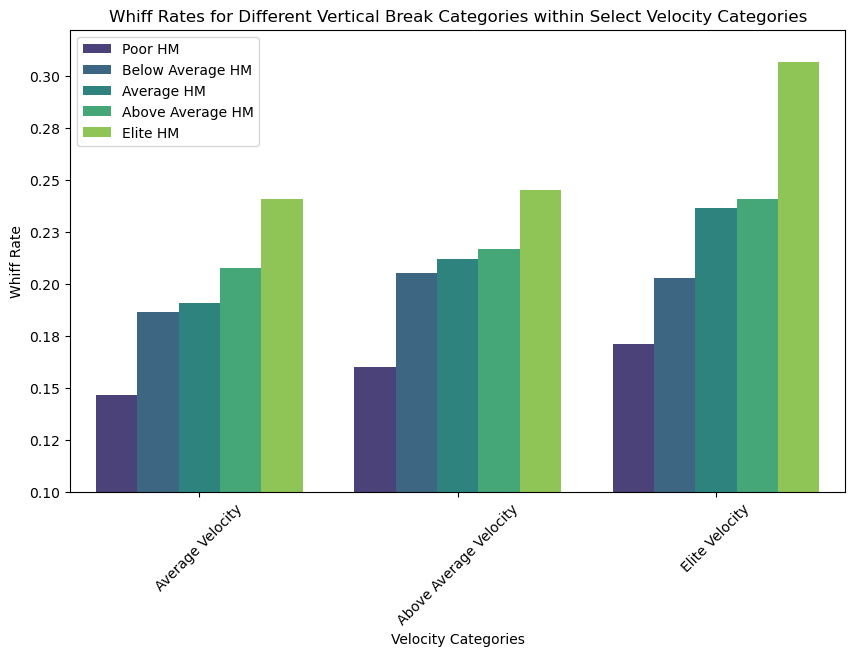

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker

# Example data
data = {
    'Velocity Category': ['Poor Velocity', 'Below Average Velocity', 'Average Velocity', 'Above Average Velocity', 'Elite Velocity'],
    'Poor HM': [0.163122, 0.159528, 0.146605, 0.159821, 0.170981],
    'Below Average HM': [0.171841, 0.171446,0.186379, 0.205326, 0.202660],
    'Average HM': [0.156688,0.191664, 0.190853, 0.211840, 0.236669],
    'Above Average HM': [0.169388, 0.174954, 0.207849, 0.21664,  0.240679],
    'Elite HM': [0.188685, 0.211313,0.240702, 0.244954, 0.306871]
}

# Create DataFrame
df = pd.DataFrame(data)

# Filter dataframe to include "Average Velocity", "Above Velocity", and "Elite Velocity" categories
df_filtered = df[df['Velocity Category'].isin(['Average Velocity', 'Above Average Velocity', 'Elite Velocity'])]

# Melt the DataFrame for Seaborn
df_melted = pd.melt(df_filtered, id_vars=['Velocity Category'], var_name='Vertical Break Category', value_name='Whiff Rate')

# Create a grouped bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Velocity Category', y='Whiff Rate', hue='Vertical Break Category', data=df_melted, palette='viridis')

# Add labels and title
plt.xlabel('Velocity Categories')
plt.ylabel('Whiff Rate')
plt.title('Whiff Rates for Different Vertical Break Categories within Select Velocity Categories')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set the lower limit of the y-axis
plt.ylim(0.10, None)

# Set y-axis tick formatter to display as .10 instead of .100
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.2f}'))

# Move the legend to the left corner
plt.legend(loc='upper left')

# Show the plot
plt.show()
